In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
# read data file
data = pd.read_csv('Downloads/ratio_analysis.csv')

In [81]:
print(data.head())

   gvkey             conm   tic    sich  fyear datadate     ratio  permno  \
0  12994  GAS NATURAL INC  EGAS  4924.0   1990  6/30/90  1.400238   10001   
1  12994  GAS NATURAL INC  EGAS  4924.0   1991  6/30/91  1.411480   10001   
2  12994  GAS NATURAL INC  EGAS  4924.0   1992  6/30/92  1.545870   10001   
3  12994  GAS NATURAL INC  EGAS  4924.0   1993  6/30/93  2.059437   10001   
4  12994  GAS NATURAL INC  EGAS  4924.0   1994  6/30/94  1.982692   10001   

     return  
0  0.428277  
1  0.178828  
2  0.231463  
3  0.056682  
4 -0.040289  


In [93]:
# describe the ratio column
print(data['ratio'].describe())
print('median\t', data['ratio'].median())

count    179297.000000
mean          4.140465
std         151.283865
min      -14369.993200
25%           1.063042
50%           1.787158
75%           3.238770
max       43685.714290
Name: ratio, dtype: float64
median	 1.7871584180000002


In [29]:
# find the other percentiles
fifth = np.nanpercentile(data['ratio'].to_numpy(),5)
ninetyfifth = np.nanpercentile(data['ratio'].to_numpy(),95)

print("5%\t", fifth)
print("95%\t", ninetyfifth)

5%	 0.21412788160000001
95%	 9.805500813999966


AxesSubplot(0.125,0.125;0.775x0.755)


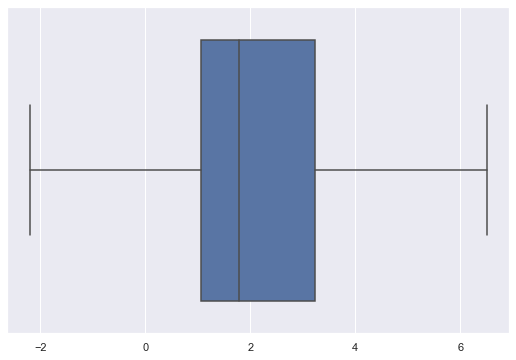

In [82]:
# plot the box and whisker plot without outliers
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

print(sns.boxplot([data['ratio'].to_numpy()], ax=ax,showfliers = False))

In [95]:
# print the median ratio by year
print('median\t', data.groupby(['fyear'], as_index=True)['ratio'].median())

median	 fyear
1990    1.239926
1991    1.574841
1992    1.766198
1993    1.853088
1994    1.669852
1995    1.883949
1996    2.030385
1997    2.232697
1998    1.774401
1999    1.753292
2000    1.516784
2001    1.607131
2002    1.413357
2003    2.042467
2004    2.171353
2005    2.151297
2006    2.201441
2007    1.915595
2008    1.147831
2009    1.512027
2010    1.681561
2011    1.489587
2012    1.594470
2013    2.006378
2014    1.983081
2015    1.760521
2016    1.961845
2017    2.023231
2018    1.637246
2019    1.791077
2020    1.974110
Name: ratio, dtype: float64


In [31]:
# plot trend of ratio against return
subdata = pd.DataFrame()
subdata['ratio'] = data['ratio']
subdata['return'] = data['return']

subdata = subdata.dropna()
print(subdata)

            ratio    return
0        1.400238  0.428277
1        1.411480  0.178828
2        1.545870  0.231463
3        2.059437  0.056682
4        1.982692 -0.040289
...           ...       ...
179733  28.821532  0.065074
179734  27.889979  0.304494
179735   7.250365 -0.064221
179736  12.402900 -0.187853
179737  11.667572  0.752608

[169902 rows x 2 columns]


In [32]:
# run a linear regression
x_train, x_test, y_train, y_test = train_test_split(subdata['ratio'].to_numpy(), 
subdata['return'].to_numpy(), test_size = 0.8, random_state = 365)

reg = LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

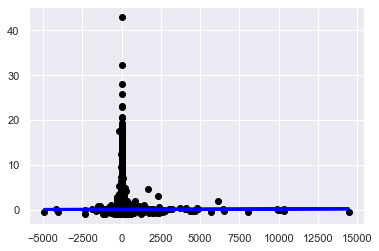

In [33]:
# check if the regression makes sense by plotting actual against predicted
y_hat = reg.predict(x_test.reshape(-1, 1))
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_hat, color='blue', linewidth=3)

In [97]:
# look at trend in computer-related businesses
techFrame = pd.DataFrame()
for r in range(0, len(data)):
    row = data.iloc[r]
    if row[3] >= 7370 and row[3] <= 7377:
        techFrame = techFrame.append(row)

print(techFrame['ratio'].describe())
print('median\t', techFrame['ratio'].median())

count    13457.000000
mean         4.752094
std         62.273330
min      -4164.705882
25%          1.506206
50%          2.952331
75%          5.578934
max       2567.545455
Name: ratio, dtype: float64
median	 2.9523306610000004


In [98]:
# look at trend in real estate investment trusts
reitFrame = pd.DataFrame()
for r in range(0,len(data)):
    row = data.iloc[r]
    if row[3] == 6798:
        reitFrame = reitFrame.append(row)

print(reitFrame['ratio'].describe())
print('median\t', reitFrame['ratio'].median())

count    5600.000000
mean        1.855398
std        10.404759
min      -213.131313
25%         0.968302
50%         1.433474
75%         2.072944
max       650.510204
Name: ratio, dtype: float64
median	 1.4334737630000003


In [83]:
# sort the tech companies into deciles based on ratio
techFrame['decile_rank'] = pd.qcut(techFrame['ratio'], 10, labels=False)
print(techFrame.head())

                   conm  datadate   fyear    gvkey   permno     ratio  \
94   DELTA COMPUTEC INC  10/31/90  1990.0  11881.0  10018.0  3.026463   
95   DELTA COMPUTEC INC  10/31/91  1991.0  11881.0  10018.0  1.862293   
96   DELTA COMPUTEC INC  10/31/92  1992.0  11881.0  10018.0  3.257166   
119     DOCUGRAPHIX INC   4/30/91  1990.0   4008.0  10024.0 -3.667377   
120     DOCUGRAPHIX INC   4/30/92  1991.0   4008.0  10024.0 -0.893536   

       return    sich    tic  decile_rank  
94   0.795918  7370.0  3DCIS          5.0  
95   0.454545  7370.0  3DCIS          3.0  
96  -0.562500  7370.0  3DCIS          5.0  
119 -0.300000  7373.0   DOCG          0.0  
120       NaN  7373.0   DOCG          0.0  


In [96]:
# sort the REITs into deciles based on ratio
reitFrame['decile_rank'] = pd.qcut(reitFrame['ratio'], 10, labels=False)
print(reitFrame.head())

                            conm datadate   fyear    gvkey   permno     ratio  \
4287  CHICAGO DOCK & CANAL TRUST  4/30/91  1990.0  12664.0  10770.0  1.744057   
4288  CHICAGO DOCK & CANAL TRUST  4/30/92  1991.0  12664.0  10770.0  0.568365   
4289  CHICAGO DOCK & CANAL TRUST  4/30/93  1992.0  12664.0  10770.0  0.662176   
4290  CHICAGO DOCK & CANAL TRUST  4/30/94  1993.0  12664.0  10770.0  0.671821   
4291  CHICAGO DOCK & CANAL TRUST  4/30/95  1994.0  12664.0  10770.0  0.784951   

        return    sich    tic  decile_rank  
4287 -0.317180  6798.0  DOCKS            6  
4288  0.077232  6798.0  DOCKS            0  
4289  0.085569  6798.0  DOCKS            1  
4290  0.404760  6798.0  DOCKS            1  
4291  0.074031  6798.0  DOCKS            1  


In [85]:
# sort by F-year for tech companies
sortedlist_tech = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

for r in range(0, len(techFrame)):
    row = techFrame.iloc[r]
    sortedlist_tech[int(row[2])-1990].append([row[5],row[2],row[6],row[9]])

In [86]:
# sort by F-year for REITs
sortedlist_reit = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

for r in range(0, len(reitFrame)):
    row = reitFrame.iloc[r]
    sortedlist_reit[int(row[2])-1990].append([row[5],row[2],row[6],row[9]])

In [87]:
# print the tech companies' Mean and Median return for each year
for i in range(0, 30, 1):
    year_df = pd.DataFrame(sortedlist_tech[i])

    print('Year '+str(i+1)+' mean: \t', year_df[2].mean())
    print('Year '+str(i+1)+' median: \t', year_df[2].median())

Year 1 mean: 	 0.4221527906659607
Year 1 median: 	 0.11764706300000001
Year 2 mean: 	 0.07549706304198114
Year 2 median: 	 -0.064358694
Year 3 mean: 	 0.1741093428844916
Year 3 median: 	 -8e-09
Year 4 mean: 	 0.22599917628627086
Year 4 median: 	 0.0760959645
Year 5 mean: 	 0.5970846008077634
Year 5 median: 	 0.214285705
Year 6 mean: 	 -0.06758440276905371
Year 6 median: 	 -0.18918918699999998
Year 7 mean: 	 0.4457215151843014
Year 7 median: 	 0.194176799
Year 8 mean: 	 0.12117096548404072
Year 8 median: 	 -0.19999998300000002
Year 9 mean: 	 0.74789082074684
Year 9 median: 	 0.2306547885
Year 10 mean: 	 -0.43564357406187965
Year 10 median: 	 -0.6449909420000001
Year 11 mean: 	 -0.11722840412490752
Year 11 median: 	 -0.300000049
Year 12 mean: 	 -0.032762067164444464
Year 12 median: 	 -0.247619003
Year 13 mean: 	 0.9246870692141594
Year 13 median: 	 0.48986060600000003
Year 14 mean: 	 -0.02689724697678069
Year 14 median: 	 -0.065104156
Year 15 mean: 	 0.2523393319008452
Year 15 median: 	 

In [88]:
# print the REITs' Mean and Median return for each year
for i in range(0, 30, 1):
    year_df = pd.DataFrame(sortedlist_reit[i])

    print('Year '+str(i+1)+' mean: \t', year_df[2].mean())
    print('Year '+str(i+1)+' median: \t', year_df[2].median())

Year 1 mean: 	 0.037405751872881345
Year 1 median: 	 0.0299270715
Year 2 mean: 	 0.21363678033501515
Year 2 median: 	 0.2643677655
Year 3 mean: 	 0.1734676653676471
Year 3 median: 	 0.11783310999999999
Year 4 mean: 	 0.0653384113522727
Year 4 median: 	 0.012344828
Year 5 mean: 	 0.19584294775135117
Year 5 median: 	 0.19094457850000002
Year 6 mean: 	 0.3059745946323771
Year 6 median: 	 0.24959404899999998
Year 7 mean: 	 0.2116259455974746
Year 7 median: 	 0.1664558275
Year 8 mean: 	 -0.09778931007881769
Year 8 median: 	 -0.079023608
Year 9 mean: 	 -0.017704123995238092
Year 9 median: 	 -0.004990184
Year 10 mean: 	 0.21250429444549768
Year 10 median: 	 0.23266598300000002
Year 11 mean: 	 0.2941177883814433
Year 11 median: 	 0.2877397155
Year 12 mean: 	 0.0620595326508876
Year 12 median: 	 0.083188351
Year 13 mean: 	 0.2691442440608107
Year 13 median: 	 0.21216934450000002
Year 14 mean: 	 0.26491330204117647
Year 14 median: 	 0.267685242
Year 15 mean: 	 0.17112202492783513
Year 15 median:

In [89]:
# get the tech companies' Mean and Median return for each year grouped by decile
for i in range(0, 30, 1):
    year_df = pd.DataFrame(sortedlist_tech[i])

    print('Year '+str(i+1)+' mean: \t', year_df.groupby(year_df[3], as_index=True)[2].mean())
    print('Year '+str(i+1)+' median: \t', year_df.groupby(year_df[3], as_index=True)[2].median())


Year 1 mean: 	 3
0.0    0.370733
1.0    0.548074
2.0    0.424130
3.0    0.426930
4.0    0.183313
5.0    0.025604
6.0    0.681671
7.0    0.080021
8.0    0.382529
9.0    0.464055
Name: 2, dtype: float64
Year 1 median: 	 3
0.0    0.128623
1.0    0.159033
2.0    0.306863
3.0   -0.003360
4.0    0.263158
5.0   -0.100595
6.0    0.244386
7.0   -0.153846
8.0    0.090909
9.0    0.172222
Name: 2, dtype: float64
Year 2 mean: 	 3
0.0    0.084380
1.0    0.161138
2.0    0.333182
3.0    0.102949
4.0    0.093369
5.0   -0.022382
6.0   -0.073809
7.0    0.024944
8.0    0.162292
9.0   -0.186986
Name: 2, dtype: float64
Year 2 median: 	 3
0.0   -0.047444
1.0    0.018182
2.0    0.050862
3.0    0.040000
4.0   -0.121408
5.0   -0.142857
6.0   -0.188143
7.0   -0.170238
8.0    0.015348
9.0   -0.222222
Name: 2, dtype: float64
Year 3 mean: 	 3
0.0    0.440877
1.0    0.172663
2.0    0.108933
3.0    0.471436
4.0    0.207463
5.0    0.221848
6.0    0.178919
7.0   -0.031756
8.0    0.158679
9.0   -0.276172
Name: 2, dtype:

In [90]:
# get the REITs' Mean and Median return for each year grouped by decile
for i in range(0, 30, 1):
    year_df = pd.DataFrame(sortedlist_reit[i])

    print('Year '+str(i+1)+' mean: \t', year_df.groupby(year_df[3])[2].mean())
    print('Year '+str(i+1)+' median: \t', year_df.groupby(year_df[3])[2].median())


Year 1 mean: 	 3
0   -0.018654
1    0.073279
2    0.215101
3   -0.058961
4    0.104558
5    0.171578
6    0.037002
7    0.185405
8    0.263791
9    0.254924
Name: 2, dtype: float64
Year 1 median: 	 3
0   -0.078297
1    0.076914
2    0.246201
3   -0.040591
4    0.160261
5    0.216785
6    0.208928
7    0.185405
8    0.210952
9    0.254924
Name: 2, dtype: float64
Year 2 mean: 	 3
0    0.223915
1    0.197735
2   -0.051154
3    0.388808
4    0.248702
5    0.348336
6    0.305266
7    0.179895
8    0.429512
9    0.311423
Name: 2, dtype: float64
Year 2 median: 	 3
0    0.212068
1    0.318994
2    0.012469
3    0.151856
4    0.247170
5    0.358221
6    0.323250
7    0.191831
8    0.407448
9    0.291771
Name: 2, dtype: float64
Year 3 mean: 	 3
0    0.266992
1    0.099820
2    0.136262
3    0.180580
4    0.062432
5    0.058565
6    0.325394
7    0.031087
8    0.129180
9    0.104188
Name: 2, dtype: float64
Year 3 median: 	 3
0    0.164712
1    0.086156
2    0.157416
3    0.148777
4    0.099906
5 

In [ ]:
# run a clustering algorithm?
